In [1]:
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
import re
# from scipy.spatial import distance_matrix

In [9]:
purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

In [2]:
from util import *

In [3]:
X,vocab = load_data('data/cnnhealth.txt')

Importing data...


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3213: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).shape[axis]


X has 4061 examples and 9609 features in BOW format...


In [4]:
generate_statistics(X, vocab)

Dataset Statistics:
# Number of Tweets: 4061
# Number of Words (Total): 32612
# Number of Tokens: 9609
# Average Number of Words per Tweet: 8.031
# Top 10 Legal Tokens: ['health' 'getfit' 'new' '@cnnhealth' "today's" 'cancer' 'know' 'kids'
 '@drsanjaygupta' 'ebola']


In [5]:
def save_distance_matrices(X):
    distance_matrix_1 = create_distance_matrix(X,distance_type=1)
    distance_matrix_2 = create_distance_matrix(X,distance_type=2)
    with open('distance_matrices.npy', 'wb') as file:
        np.save(file, distance_matrix_1)
        np.save(file, distance_matrix_2)

In [6]:
def load_distance_matrices():
    with open('distance_matrices.npy', 'rb') as file:
        distance_matrix_1 = np.load(file)
        distance_matrix_2 = np.load(file)
    return distance_matrix_1, distance_matrix_2

In [7]:
save_distance_matrices(X)

In [42]:
distance_matrix_1, distance_matrix_2 = load_distance_matrices()

In [43]:
def unique_distances(distance_matrix):
    # takes only the unique distances (bottom triangle section with the diagonal) from the distance matrix and returns them as a list
    m,n = distance_matrix.shape
    assert m==n
    distances = []
    for i in range(m):
        for j in range(i+1):
            distances.append(distance_matrix[i,j])
    return np.array(distances)

In [44]:
plt.rcParams['figure.dpi'] = 100

In [45]:
def plot_distance_distributions(distance_matrix_1, distance_matrix_2):
    distances_1 = unique_distances(distance_matrix_1)
    distances_2 = unique_distances(distance_matrix_2)
    fig, axes = plt.subplots(2, 1)
    fig.set_size_inches(6,6)
    fig.tight_layout()
    axes[0].hist(distances_1, bins=40, color=purples[4])
    axes[0].set_title('Distribution of Distances under Measure 1')
    axes[0].set_ylabel('Num instances')

    axes[1].hist(distances_2, bins=40, color=purples[4])
    axes[1].set_title('Distribution of Distances under Measure 2')
    axes[1].set_xlabel('Distance')
    axes[1].set_ylabel('Num instances')
    plt.show();

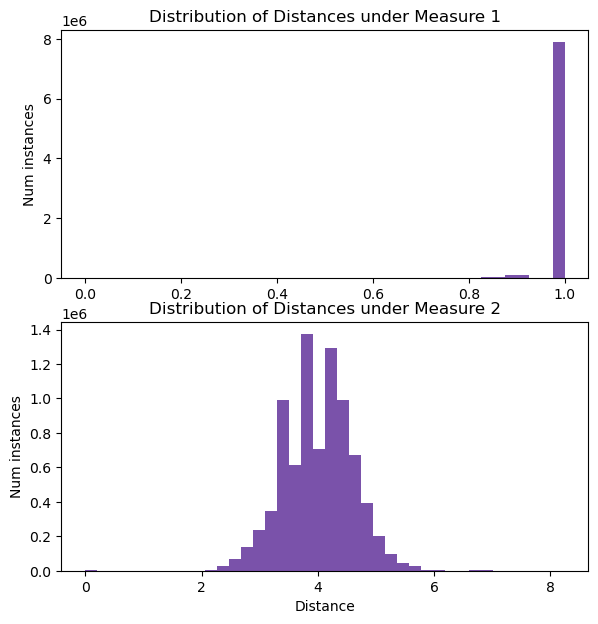

In [46]:
plot_distance_distributions(distance_matrix_1, distance_matrix_2)